<a href="https://www.kaggle.com/code/kathmer/zara-sales-prediction-machine-learning-project?scriptVersionId=272694151" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# 🧠 Zara Sales Prediction — Machine Learning Project

## 📌 Project Overview

This project analyzes real product data from **Zara** to understand what drives high sales performance and to build a machine learning model that predicts whether a product will have **high sales volume** based on its attributes (price, promotion, product position, season, material, etc.).

> Goal: help merchandisers and pricing teams predict product performance *before* launch.

---

## 🔍 Dataset

Source: Kaggle — *Zara Sales Insights*

**Each row = one product item.**

| Column Name          | Description |
|----------------------|-------------|
| `price`              | Selling price of the product |
| `Sales Volume`       | Number of units sold |
| `Product Position`   | Aisle / End-cap / Wall placement |
| `Promotion`          | Whether the product was promoted |
| `terms`              | Clothing category (jackets, shirts, etc.) |
| `season`             | When the product was released (Autumn, Winter…) |
| `section`            | Target segment (WOMAN / MAN) |
| `material`, `origin` | Product manufacturing info |

---

## 🧹 Data Preparation

✅ Cleaned column names  
✅ Converted categorical variables into numerical values using **One-Hot Encoding**  
✅ Created a new binary target variable:

```python
# df['HighSales'] = (df['Sales Volume'] > df['Sales Volume'].median()).astype(int)

🤖 Machine Learning Model
Model used:

✅ Random Forest Classifier

Training process:

Split data into train (80%) / test (20%)

Encoded categorical features using get_dummies()

Trained model to predict HighSales

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/kaggle/input/zara-sales-eda/Zara_sales_EDA.csv")

In [3]:
df.head()

,Product ID,Product Position,Promotion,Product Category,Seasonal,Sales Volume,brand,url,name,description,price,currency,terms,section,season,material,origin
0,185102,Aisle,Yes,clothing,Yes,1243,Zara,https://www.zara.com/us/en/basic-puffer-jacket...,BASIC PUFFER JACKET,Puffer jacket made of tear-resistant ripstop f...,78.99,USD,jackets,MAN,Winter,Polyester,Brazil
1,188771,Aisle,Yes,clothing,No,1429,Zara,https://www.zara.com/us/en/tuxedo-jacket-p0889...,TUXEDO JACKET,Straight fit blazer. Pointed lapel collar and ...,14.99,USD,jackets,MAN,Autumn,Cotton,Turkey
2,180176,End-cap,Yes,clothing,Yes,1168,Zara,https://www.zara.com/us/en/slim-fit-suit-jacke...,SLIM FIT SUIT JACKET,Slim fit jacket. Notched lapel collar. Long sl...,71.95,USD,jackets,WOMAN,Autumn,Polyester,Morocco
3,112917,Aisle,Yes,clothing,No,1348,Zara,https://www.zara.com/us/en/stretch-suit-jacket...,STRETCH SUIT JACKET,Slim fit jacket made of viscose blend fabric. ...,30.99,USD,jackets,MAN,Spring,Polyester,China
4,192936,End-cap,Yes,clothing,Yes,1602,Zara,https://www.zara.com/us/en/double-faced-jacket...,DOUBLE FACED JACKET,Jacket made of faux leather faux shearling wit...,22.99,USD,jackets,WOMAN,Winter,Wool Blend,China


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20252 entries, 0 to 20251
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product ID        20252 non-null  int64  
 1   Product Position  20252 non-null  object 
 2   Promotion         20252 non-null  object 
 3   Product Category  20252 non-null  object 
 4   Seasonal          20252 non-null  object 
 5   Sales Volume      20252 non-null  int64  
 6   brand             20252 non-null  object 
 7   url               20252 non-null  object 
 8   name              20251 non-null  object 
 9   description       20250 non-null  object 
 10  price             20252 non-null  float64
 11  currency          20252 non-null  object 
 12  terms             20252 non-null  object 
 13  section           20252 non-null  object 
 14  season            20252 non-null  object 
 15  material          20252 non-null  object 
 16  origin            20252 non-null  object

In [5]:
df.shape

(20252, 17)

In [6]:
df.isnull().sum()

Product ID          0
Product Position    0
Promotion           0
Product Category    0
Seasonal            0
Sales Volume        0
brand               0
url                 0
name                1
description         2
price               0
currency            0
terms               0
section             0
season              0
material            0
origin              0
dtype: int64

In [7]:
df[df.duplicated()]

,Product ID,Product Position,Promotion,Product Category,Seasonal,Sales Volume,brand,url,name,description,price,currency,terms,section,season,material,origin


In [8]:
df['terms'].value_counts(dropna=False)

terms
jackets     11232
sweaters     3257
t-shirts     2646
shoes        2458
jeans         659
Name: count, dtype: int64

In [9]:
df['section'].value_counts(dropna=False)

section
WOMAN    13254
MAN       6998
Name: count, dtype: int64

In [10]:
df['season'].value_counts(dropna=False)

season
Autumn    7665
Winter    5144
Spring    4537
Summer    2906
Name: count, dtype: int64

In [11]:
df['material'].value_counts(dropna=False)

material
Cotton         3851
Wool           3805
Wool Blend     3373
Polyester      2775
Linen          2573
Denim          1027
Viscose         990
Acrylic         881
Linen Blend     807
Satin           132
Silk             38
Name: count, dtype: int64

In [12]:
df['origin'].value_counts(dropna=False)

origin
China         4026
Bangladesh    3617
Turkey        2475
India         2033
Morocco       1653
Portugal      1420
Spain         1248
Vietnam       1220
Cambodia       981
Brazil         795
Pakistan       605
Argentina      179
Name: count, dtype: int64

In [13]:
df['brand'].value_counts(dropna=False)

brand
Zara    20252
Name: count, dtype: int64

In [14]:
df = df.drop(columns=['brand', 'description', 'url', 'Product Category'])

In [15]:
df.head()

,Product ID,Product Position,Promotion,Seasonal,Sales Volume,name,price,currency,terms,section,season,material,origin
0,185102,Aisle,Yes,Yes,1243,BASIC PUFFER JACKET,78.99,USD,jackets,MAN,Winter,Polyester,Brazil
1,188771,Aisle,Yes,No,1429,TUXEDO JACKET,14.99,USD,jackets,MAN,Autumn,Cotton,Turkey
2,180176,End-cap,Yes,Yes,1168,SLIM FIT SUIT JACKET,71.95,USD,jackets,WOMAN,Autumn,Polyester,Morocco
3,112917,Aisle,Yes,No,1348,STRETCH SUIT JACKET,30.99,USD,jackets,MAN,Spring,Polyester,China
4,192936,End-cap,Yes,Yes,1602,DOUBLE FACED JACKET,22.99,USD,jackets,WOMAN,Winter,Wool Blend,China


In [16]:
df['total revenue'] = round(df['Sales Volume'] * df['price'],1)

In [17]:
df['Promotion'].value_counts(dropna=False)

Promotion
No     11812
Yes     8440
Name: count, dtype: int64

In [18]:
df['Seasonal'].value_counts(dropna=False)

Seasonal
No     10136
Yes    10116
Name: count, dtype: int64

In [19]:
df['median price'] = df['price'].median()

In [20]:
df['premium item'] = np.where(df['price'] > df['median price'], True, False)

In [21]:
df['cost estimate'] = round(df['price'] * 0.4,1)

What product section (MAN, WOMAN, etc.) generates the highest:

sales volume?
total revenue?

<Axes: title={'center': 'How much revenue is generated by each section'}, ylabel='total revenue'>

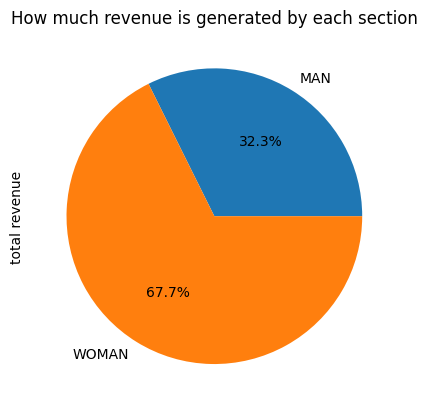

In [22]:
df.groupby('section')['total revenue'].sum().plot(
    kind='pie',
    title='How much revenue is generated by each section',
    autopct = '%1.1f%%'
)

<Axes: title={'center': 'How much sales volume is generated by each section'}, ylabel='Sales Volume'>

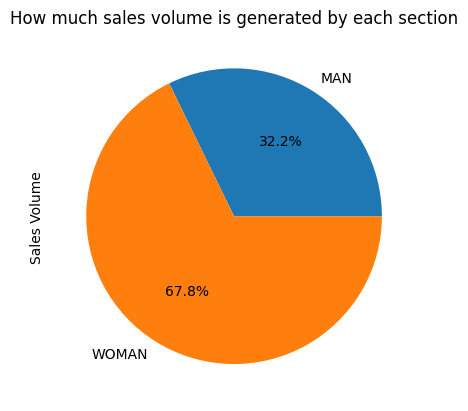

In [23]:
df.groupby('section')['Sales Volume'].sum().plot(
    kind='pie',
    title='How much sales volume is generated by each section',
    autopct = '%1.1f%%'
)

Which Product Category (e.g., jackets) sells the most units?

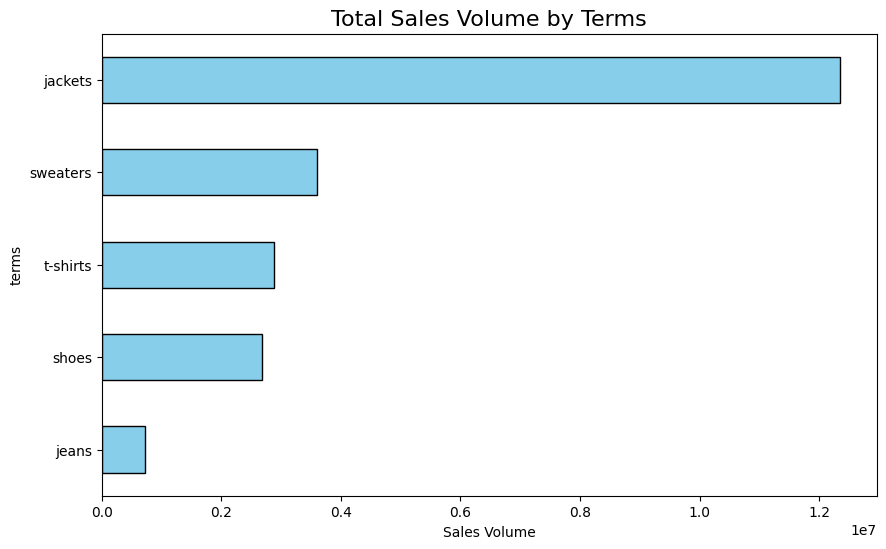

In [24]:
df.groupby('terms')['Sales Volume'].sum()\
  .sort_values().plot(kind='barh', figsize=(10,6), color='skyblue', edgecolor="black", xlabel="Sales Volume")
plt.title("Total Sales Volume by Terms", fontsize=16)
plt.show()


Do promoted items (Promotion = Yes) have higher sales volume than non-promoted?

<Axes: title={'center': 'Are items on promotion selling better?'}, ylabel='Sales Volume'>

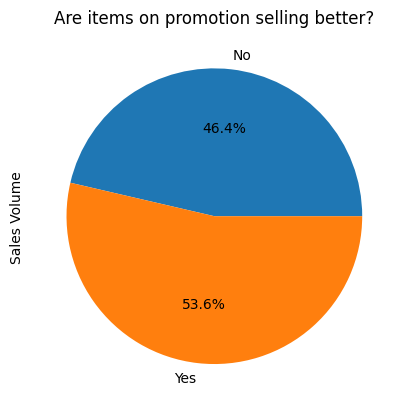

In [25]:
df.groupby('Promotion')['Sales Volume'].sum().plot(
    kind='pie',
    title='Are items on promotion selling better?',
    autopct = '%1.1f%%'
)

Compare sales volume by product position: Aisle vs. End-cap vs. Wall

<Axes: xlabel='Product Position', ylabel='Total Revenue'>

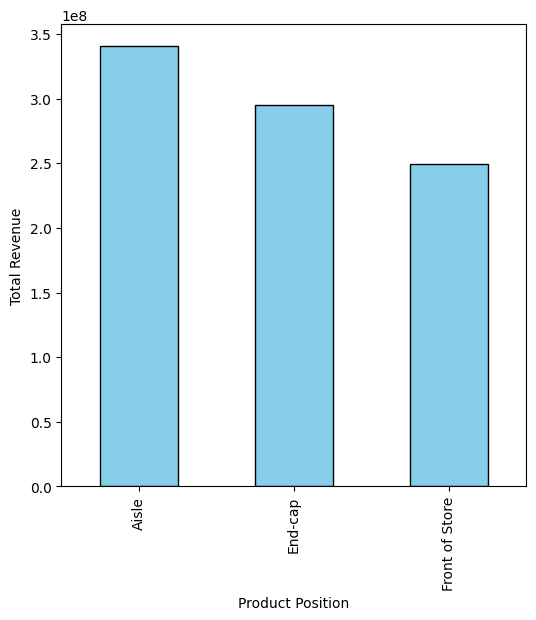

In [26]:
df.groupby('Product Position')['total revenue'].sum().plot.bar(figsize=(6,6),color='skyblue', edgecolor="black", ylabel='Total Revenue')

Which season (Autumn/Winter/Spring/etc.) has the highest average price?

In [27]:
df.groupby('season')[['price']].mean().sort_values('price',ascending=False)

,price
season,
Summer,44.081700
Winter,43.934267
Spring,40.735105
Autumn,40.526800


In [28]:
df.head()

,Product ID,Product Position,Promotion,Seasonal,Sales Volume,name,price,currency,terms,section,season,material,origin,total revenue,median price,premium item,cost estimate
0,185102,Aisle,Yes,Yes,1243,BASIC PUFFER JACKET,78.99,USD,jackets,MAN,Winter,Polyester,Brazil,98184.6,35.95,True,31.6
1,188771,Aisle,Yes,No,1429,TUXEDO JACKET,14.99,USD,jackets,MAN,Autumn,Cotton,Turkey,21420.7,35.95,False,6.0
2,180176,End-cap,Yes,Yes,1168,SLIM FIT SUIT JACKET,71.95,USD,jackets,WOMAN,Autumn,Polyester,Morocco,84037.6,35.95,True,28.8
3,112917,Aisle,Yes,No,1348,STRETCH SUIT JACKET,30.99,USD,jackets,MAN,Spring,Polyester,China,41774.5,35.95,False,12.4
4,192936,End-cap,Yes,Yes,1602,DOUBLE FACED JACKET,22.99,USD,jackets,WOMAN,Winter,Wool Blend,China,36830.0,35.95,False,9.2


Does material affect price? (top 5 most expensive materials)

<Axes: ylabel='material'>

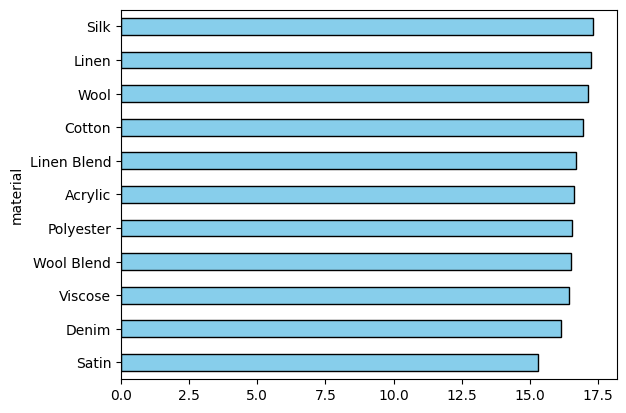

In [29]:
df.groupby('material')['cost estimate'].mean().sort_values().plot.barh(color='skyblue', edgecolor="black")

Which country of origin (origin) manufactures the best-selling items?

<Axes: ylabel='origin'>

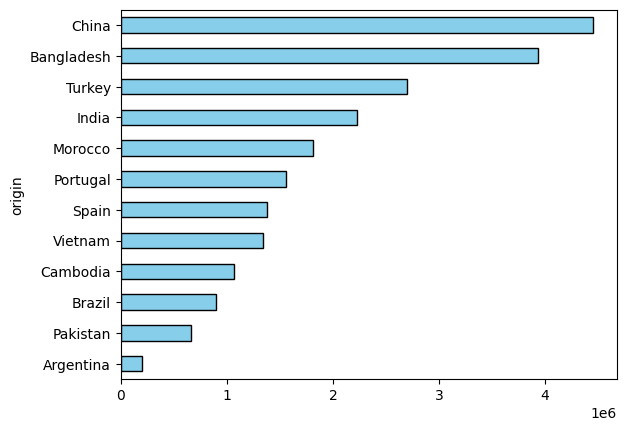

In [30]:
df.groupby('origin')['Sales Volume'].sum().sort_values().plot.barh(color='skyblue', edgecolor="black")

Pie chart: Revenue distribution by product category.

<Axes: title={'center': 'Revenue distribution by product category'}, ylabel='total revenue'>

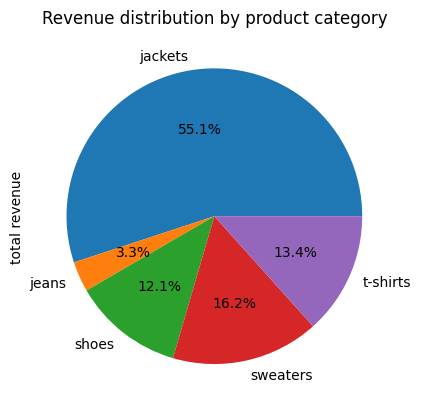

In [31]:
df.groupby('terms')['total revenue'].sum().plot(
    kind='pie',
    autopct= '%1.1f%%',
    title='Revenue distribution by product category'
)

Boxplot: Price distribution by product position.

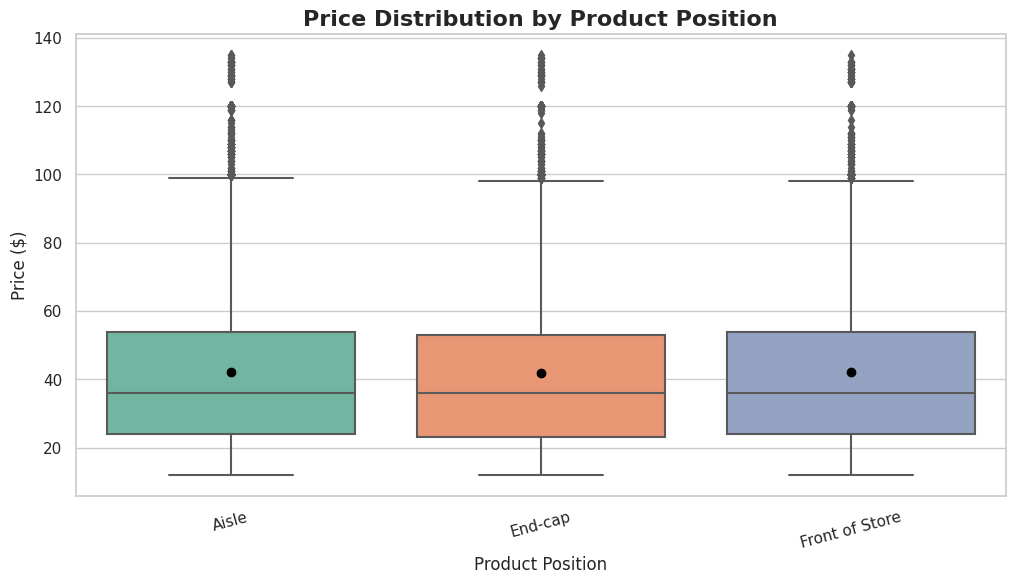

In [32]:
plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")  # cleaner background

order = df.groupby('Product Position')['price'].median().sort_values().index

sns.boxplot(
    data=df,
    x='Product Position',
    y='price',
    order=order,
    showmeans=True,
    meanprops={"marker":"o",
               "markerfacecolor":"black",
               "markeredgecolor":"black",
               "markersize":"6"},
    palette="Set2"
)

plt.title('Price Distribution by Product Position', fontsize=16, fontweight='bold')
plt.xlabel('Product Position', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.xticks(rotation=15)
plt.show()

Heatmap: Season vs. promotion vs. sales volume.

In [33]:
pivot = df.pivot_table(
    values='Sales Volume',
    index='season',            # rows = season (Winter, Spring, etc.)
    columns='Promotion',       # columns = Yes / No
    aggfunc='sum',             # sum of sales volume
    fill_value=0               # replace NaN with 0
)

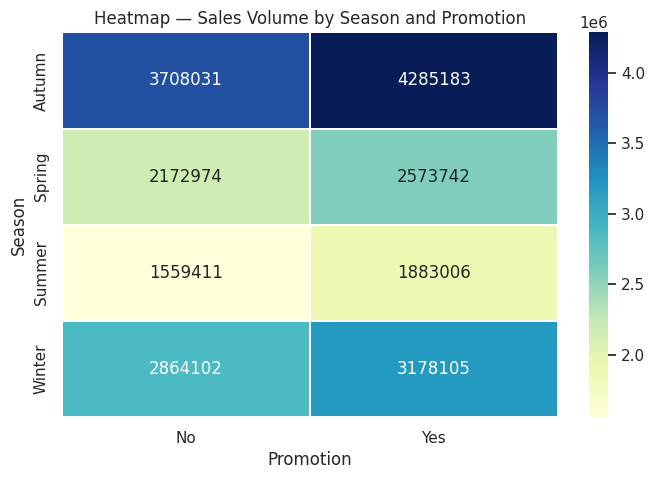

In [34]:
plt.figure(figsize=(8, 5))
sns.set_theme(style="white")  # cleaner theme

sns.heatmap(
    pivot,
    annot=True,        # show numbers in cells
    cmap="YlGnBu",     
    fmt=".0f",         # format numbers as integers
    linewidths=0.3,    
)

plt.title("Heatmap — Sales Volume by Season and Promotion")
plt.xlabel("Promotion")
plt.ylabel("Season")
plt.show()

Scatter plot: Price vs. sales volume (is price correlated with demand?).

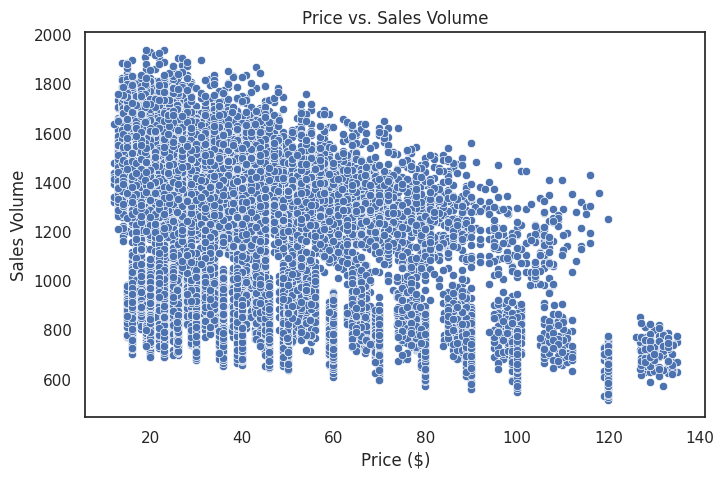

In [35]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='price', y='Sales Volume')

plt.title("Price vs. Sales Volume")
plt.xlabel("Price ($)")
plt.ylabel("Sales Volume")
plt.show()

Identify top 10 best-selling products (by Sales Volume).

In [36]:
df.groupby('name')['Sales Volume'].sum().sort_values(ascending=False).head(10)

name
PLAID OVERSHIRT                      9119
FAUX SUEDE BOMBER JACKET             6237
SUIT JACKET IN 100% LINEN            6198
CONTRASTING PATCHES BOMBER JACKET    6088
POCKET OVERSHIRT                     5621
PATCH BOMBER JACKET                  5567
FAUX LEATHER PUFFER JACKET           5283
FAUX LEATHER BOMBER JACKET           5262
HOODED TECHNICAL JACKET              5146
FAUX SUEDE JACKET                    5144
Name: Sales Volume, dtype: int64

Identify bottom 10 worst performers.

In [37]:
df.groupby('name')['Sales Volume'].sum().sort_values(ascending=False).tail(10)

name
RIBBED CHUNKY SOLE HIGH TOP SNEAKERS WHITE                            566
DOUBLE-BREASTED TEXTURED WEAVE OVERSHIRT                              563
KNIT TEXTURED POCKET JACKET SKY BLUE                                  562
DOUBLE-BREASTED SUEDE HIGH-TOPS BURGUNDY                              559
STRETCH SOFT JEWEL SWEATER BLACK                                      547
PLEATED TEXTURED WEAVE OVERSHIRT CHARCOAL                             539
BELTED ACID WASH DENIM JACKET                                         534
STRETCH JACQUARD DENIM JACKET STONE                                   533
SLIM TEXTURED JACKET WHITE                                            528
DOUBLE-BREASTED FAUX LEATHER OVERSIZED JACKET LIMITED EDITION GREY    518
Name: Sales Volume, dtype: int64

Which season has the highest average revenue?

In [38]:
df.head()

,Product ID,Product Position,Promotion,Seasonal,Sales Volume,name,price,currency,terms,section,season,material,origin,total revenue,median price,premium item,cost estimate
0,185102,Aisle,Yes,Yes,1243,BASIC PUFFER JACKET,78.99,USD,jackets,MAN,Winter,Polyester,Brazil,98184.6,35.95,True,31.6
1,188771,Aisle,Yes,No,1429,TUXEDO JACKET,14.99,USD,jackets,MAN,Autumn,Cotton,Turkey,21420.7,35.95,False,6.0
2,180176,End-cap,Yes,Yes,1168,SLIM FIT SUIT JACKET,71.95,USD,jackets,WOMAN,Autumn,Polyester,Morocco,84037.6,35.95,True,28.8
3,112917,Aisle,Yes,No,1348,STRETCH SUIT JACKET,30.99,USD,jackets,MAN,Spring,Polyester,China,41774.5,35.95,False,12.4
4,192936,End-cap,Yes,Yes,1602,DOUBLE FACED JACKET,22.99,USD,jackets,WOMAN,Winter,Wool Blend,China,36830.0,35.95,False,9.2


<Axes: ylabel='season'>

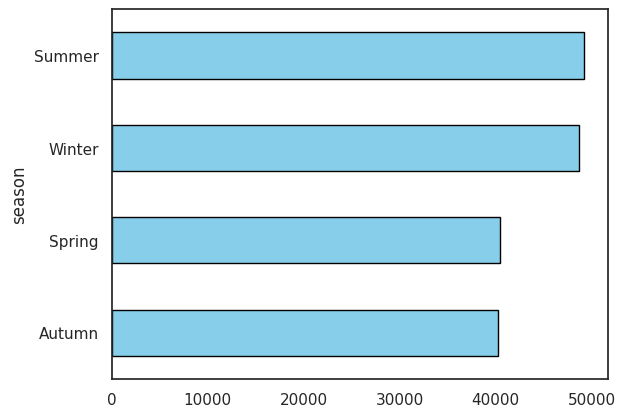

In [39]:
df.groupby('season')['total revenue'].mean().sort_values(ascending=True).plot.barh(color='skyblue', edgecolor="black")

Can we predict if a product will have high sales volume based on its attributes?

In [40]:
median_sales = df['Sales Volume'].median()

Create the target column

In [41]:
df['HighSales'] = (df['Sales Volume'] > median_sales).astype(int)

In [42]:
df.head(10)

,Product ID,Product Position,Promotion,Seasonal,Sales Volume,name,price,currency,terms,section,season,material,origin,total revenue,median price,premium item,cost estimate,HighSales
0,185102,Aisle,Yes,Yes,1243,BASIC PUFFER JACKET,78.99,USD,jackets,MAN,Winter,Polyester,Brazil,98184.6,35.95,True,31.6,1
1,188771,Aisle,Yes,No,1429,TUXEDO JACKET,14.99,USD,jackets,MAN,Autumn,Cotton,Turkey,21420.7,35.95,False,6.0,1
2,180176,End-cap,Yes,Yes,1168,SLIM FIT SUIT JACKET,71.95,USD,jackets,WOMAN,Autumn,Polyester,Morocco,84037.6,35.95,True,28.8,1
3,112917,Aisle,Yes,No,1348,STRETCH SUIT JACKET,30.99,USD,jackets,MAN,Spring,Polyester,China,41774.5,35.95,False,12.4,1
4,192936,End-cap,Yes,Yes,1602,DOUBLE FACED JACKET,22.99,USD,jackets,WOMAN,Winter,Wool Blend,China,36830.0,35.95,False,9.2,1
5,117590,End-cap,Yes,Yes,1282,CONTRASTING COLLAR JACKET,25.95,USD,jackets,WOMAN,Autumn,Cotton,Turkey,33267.9,35.95,False,10.4,1
6,189118,Front of Store,No,No,688,FAUX LEATHER PUFFER JACKET,87.99,USD,jackets,MAN,Winter,Acrylic,China,60537.1,35.95,True,35.2,0
7,182157,Aisle,Yes,Yes,1711,SUIT JACKET IN 100% LINEN,24.00,USD,jackets,WOMAN,Summer,Cotton,Portugal,41064.0,35.95,False,9.6,1
8,141861,Aisle,No,Yes,857,100% WOOL SUIT JACKET,32.95,USD,jackets,WOMAN,Winter,Wool,India,28238.2,35.95,False,13.2,0
9,137121,Aisle,No,No,769,100% FEATHER FILL PUFFER JACKET,39.95,USD,jackets,MAN,Autumn,Wool Blend,China,30721.6,35.95,True,16.0,0


In [43]:
df['Promotion'] = np.where(df['Promotion'] =="Yes", True, False)

In [44]:
df['Seasonal'] = np.where(df['Seasonal']=='Yes', True, False)

In [45]:
df['HighSales'].value_counts()

HighSales
0    10135
1    10117
Name: count, dtype: int64

Choose features (columns) to use for prediction

In [46]:
features = ['price', 'Product Position', 'Promotion', 'section','season']
target = 'HighSales'

In [47]:
x = df[features]
y = df[target]

Convert categorical text into numbers

In [48]:
x = pd.get_dummies(x, drop_first=True)

In [49]:
x

,price,Promotion,Product Position_End-cap,Product Position_Front of Store,section_WOMAN,season_Spring,season_Summer,season_Winter
0,78.99,True,False,False,False,False,False,True
1,14.99,True,False,False,False,False,False,False
2,71.95,True,True,False,True,False,False,False
3,30.99,True,False,False,False,True,False,False
4,22.99,True,True,False,True,False,False,True
...,...,...,...,...,...,...,...,...
20247,31.95,True,False,True,True,False,True,False
20248,49.99,False,False,False,True,True,False,False
20249,20.99,True,False,False,True,True,False,False
20250,64.95,False,False,False,True,False,False,True


Train / Test split

In [50]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

Train a model (Random Forest)

In [51]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

Test how good the model is

In [52]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9284127375956553
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      2024
           1       0.94      0.92      0.93      2027

    accuracy                           0.93      4051
   macro avg       0.93      0.93      0.93      4051
weighted avg       0.93      0.93      0.93      4051



Use the model to make predictions

In [53]:
example = x.iloc[0:1]   # first product
model.predict(example)

array([1])

which features mattered most?

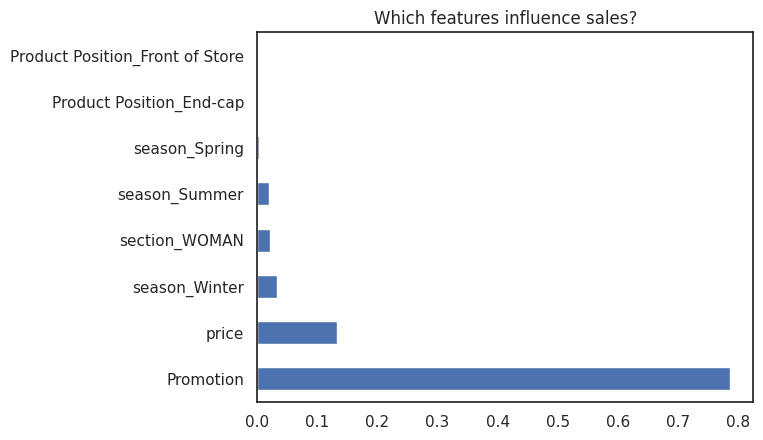

In [54]:
importance = pd.Series(model.feature_importances_, index=x.columns)
importance.nlargest(8).plot(kind='barh')
plt.title("Which features influence sales?")
plt.show()